# Content Based Filtering 

### 1. Cosine Similarity

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
# import the necessary dataset

# read in the movies tab of the spreadsheet
movies = pd.read_excel('C:/Users/ariji/OneDrive/Desktop/Data science & ML/Unsupervised Machine Learning/Data/Movie_Ratings.xlsx')
movies.head()


,Movie_ID,Movie_Title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [4]:
# 2. Remove the non-genre columns of the movie genre data

genres = movies.drop(columns='Movie_ID').set_index('Movie_Title')
genres.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
Movie_Title,,,,,,,,,,,,,,,,,,
Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
GoldenEye (1995),1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Four Rooms (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Get Shorty (1995),1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
Copycat (1995),0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [6]:
# 3. Calculate the cosine similarity of Toy Story (1995) and Get Shorty (1995)

from sklearn.metrics.pairwise import cosine_similarity

# they are somewhat similar since both are comedies
cosine_similarity(genres.loc[['Toy Story (1995)', 'Get Shorty (1995)']])

array([[1.        , 0.33333333],
       [0.33333333, 1.        ]])

In [7]:
# 4. Calculate the cosine similarity of Toy Story (1995) compared with all the movies

# calculate all the cosine similarities

cosine_matrix = cosine_similarity(genres)
cosine_matrix

array([[1.        , 0.        , 0.        , ..., 0.        , 0.57735027,
        0.        ],
       [0.        , 1.        , 0.57735027, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.57735027, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.70710678],
       [0.57735027, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.70710678, 0.        ,
        1.        ]])

In [13]:
# display the results

cosine_df = pd.DataFrame(cosine_matrix, index=movies['Movie_Title'], columns=movies['Movie_Title']).reset_index()
cosine_df.head()

Movie_Title,Movie_Title,Toy Story (1995),GoldenEye (1995),Four Rooms (1995),Get Shorty (1995),Copycat (1995),Shanghai Triad (Yao a yao yao dao waipo qiao) (1995),Twelve Monkeys (1995),Babe (1995),Dead Man Walking (1995),...,Mirage (1995),Mamma Roma (1962),"Sunchaser, The (1996)","War at Home, The (1996)",Sweet Nothing (1995),Mat' i syn (1997),B. Monkey (1998),Sliding Doors (1998),You So Crazy (1994),Scream of Stone (Schrei aus Stein) (1991)
0,Toy Story (1995),1.000000,0.000000,0.00000,0.333333,0.000000,0.00000,0.000000,0.666667,0.00000,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.57735,0.00000
1,GoldenEye (1995),0.000000,1.000000,0.57735,0.333333,0.333333,0.00000,0.000000,0.000000,0.00000,...,0.816497,0.00000,0.00000,0.00000,0.00000,0.00000,0.408248,0.000000,0.00000,0.00000
2,Four Rooms (1995),0.000000,0.577350,1.00000,0.000000,0.577350,0.00000,0.000000,0.000000,0.00000,...,0.707107,0.00000,0.00000,0.00000,0.00000,0.00000,0.707107,0.000000,0.00000,0.00000
3,Get Shorty (1995),0.333333,0.333333,0.00000,1.000000,0.333333,0.57735,0.408248,0.666667,0.57735,...,0.408248,0.57735,0.57735,0.57735,0.57735,0.57735,0.000000,0.408248,0.57735,0.57735
4,Copycat (1995),0.000000,0.333333,0.57735,0.333333,1.000000,0.57735,0.408248,0.333333,0.57735,...,0.408248,0.57735,0.57735,0.57735,0.57735,0.57735,0.408248,0.408248,0.00000,0.57735


In [18]:
# look at just Toy Story (1995)

cosine_df[['Movie_Title' , 'Toy Story (1995)']]

Movie_Title,Movie_Title,Toy Story (1995)
0,Toy Story (1995),1.000000
1,GoldenEye (1995),0.000000
2,Four Rooms (1995),0.000000
3,Get Shorty (1995),0.333333
4,Copycat (1995),0.000000
...,...,...
1677,Mat' i syn (1997),0.000000
1678,B. Monkey (1998),0.000000
1679,Sliding Doors (1998),0.000000
1680,You So Crazy (1994),0.577350


In [19]:
# 5. Return the top 5 movies with the highest cosine similarity - these make sense because they are kids movies

cosine_df[['Movie_Title', 'Toy Story (1995)']].sort_values(by='Toy Story (1995)', ascending=False).head(6)

Movie_Title,Movie_Title,Toy Story (1995)
0,Toy Story (1995),1.000000
421,Aladdin and the King of Thieves (1996),1.000000
94,Aladdin (1992),0.866025
1218,"Goofy Movie, A (1995)",0.866025
242,Jungle2Jungle (1997),0.816497
622,Angels in the Outfield (1994),0.816497


### 2. User Item Matrix

In [ ]:
# 1. Read in the movies, users and ratings tabs of the spreadsheet into three DataFrames

In [20]:
# read in the three tables of the spreadsheet
movies = pd.read_excel('C:/Users/ariji/OneDrive/Desktop/Data science & ML/Unsupervised Machine Learning/Data//Movie_Ratings.xlsx')
movies.head()

,Movie_ID,Movie_Title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [21]:
# read in the users tab
users = pd.read_excel('C:/Users/ariji/OneDrive/Desktop/Data science & ML/Unsupervised Machine Learning/Data/Movie_Ratings.xlsx', sheet_name=1)
users.head()

,User_ID,Age,Gender,Occupation
0,1,24,M,technician
1,2,53,F,other
2,3,23,M,writer
3,4,24,M,technician
4,5,33,F,other


In [22]:
# read in the ratings tab
ratings = pd.read_excel('C:/Users/ariji/OneDrive/Desktop/Data science & ML/Unsupervised Machine Learning/Data/Movie_Ratings.xlsx', sheet_name=2)
ratings.head()

,User_ID,Movie_ID,Rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [24]:
# View the range of rating

ratings.describe()

,User_ID,Movie_ID,Rating
count,100000.00000,100000.000000,100000.000000
mean,462.48475,425.530130,3.529860
std,266.61442,330.798356,1.125674
min,1.00000,1.000000,1.000000
25%,254.00000,175.000000,3.000000
50%,447.00000,322.000000,4.000000
75%,682.00000,631.000000,4.000000
max,943.00000,1682.000000,5.000000


In [30]:
# 2. Use .pivot to restructure the ratings data into a user-item matrix

X = ratings.pivot(index='User_ID' , columns='Movie_ID' , values='Rating').fillna(3)
X.head()

Movie_ID,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
User_ID,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
4,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
5,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


### 3. Truncated SVD

In [ ]:
# 1. Apply TruncatedSVD to the user-item matrix from the last assignment

In [37]:
# import truncated svd from sklearn
from sklearn.decomposition import TruncatedSVD

In [38]:
# apply SVD to the ratings
svd = TruncatedSVD(n_components=2)
svd.fit(X)

TruncatedSVD()

In [39]:
# 2. View the user-item matrix and the shape of the user-item matrix
X.head()

Movie_ID,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
User_ID,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
4,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
5,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


In [40]:
X.shape

(943, 1682)

In [41]:
# 3. View the U matrix and the shape of the U matrix

U = svd.transform(X)
U_df = pd.DataFrame(U)
U_df.head()

,0,1
0,127.325618,7.173021
1,124.145754,-2.173850
2,122.727835,-2.533027
3,123.802128,-2.822312
4,122.566026,0.754464


In [43]:
# 4. View the VT matrix and the shape of the VT matrix

VT = svd.components_
VT_df = pd.DataFrame(VT)
VT_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,0.027515,0.024345,0.024133,0.025100,0.024327,0.024231,0.026796,0.025988,0.026408,0.024741,...,0.024100,0.024109,0.024100,0.024091,0.024100,0.024083,0.024100,0.024091,0.024100,0.024100
1,0.068071,0.008371,-0.007015,0.051881,-0.004402,-0.009122,0.061830,0.073484,0.052806,0.007770,...,-0.010383,-0.009653,-0.010383,-0.010600,-0.010383,-0.009784,-0.010383,-0.010084,-0.010383,-0.010383


In [44]:
VT.shape

(2, 1682)

### 4. Choosing the number of components

In [45]:
# 1. Fit a TruncatedSVD model with 500 components

svd500 = TruncatedSVD(n_components=500)
U500 = svd500.fit_transform(X)

In [46]:
# view the U matrix

U500_df = pd.DataFrame(U500)
U500_df.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,127.325618,7.173031,0.907461,5.231709,-2.167019,-1.874486,-4.432229,2.894944,2.266183,0.029382,...,0.098514,0.108865,0.006960,0.016292,0.163035,-0.060448,0.023402,0.027662,-0.007930,-0.058297
1,124.145754,-2.173872,0.531446,0.834728,2.276656,-0.611334,-0.515801,2.473437,1.182575,-0.290647,...,0.132778,0.138946,0.400534,-0.176526,0.321781,0.452288,-0.067464,-0.086063,0.217162,-0.026672
2,122.727835,-2.533028,0.567466,-0.600540,-0.735368,0.202150,-0.220568,-1.349227,0.322606,-0.567155,...,-0.162638,-0.276747,-0.017958,0.094452,-0.413971,0.110932,-0.039967,0.165305,-0.076120,-0.334558
3,123.802128,-2.822308,-0.533045,0.232890,-0.125395,0.595281,-0.011407,0.062385,-0.514061,0.398184,...,0.209317,0.074542,-0.150426,0.115689,0.286723,0.206678,0.175597,0.005691,-0.082814,0.243229
4,122.566026,0.754483,0.591899,1.772757,-4.253326,1.408859,-3.002253,2.684717,0.209389,1.068306,...,0.065885,0.053166,0.034668,0.085805,0.031800,-0.089211,-0.071000,-0.016198,-0.189003,0.077862


In [48]:
# view the shape of the U matrix (users x latent features)
U500_df.shape

(943, 500)

In [54]:
# 2. Plot the cumulative explained variance ratios
import numpy as np

cum_evr500 = list(zip(range(1, U500.shape[1] + 1), np.cumsum(svd500.explained_variance_ratio_))) # hits 80% at 208 components
cum_evr500

[(1, 0.02634224372336998),
 (2, 0.09670746059197174),
 (3, 0.13352313267970756),
 (4, 0.15416135834298747),
 (5, 0.17065872214204275),
 (6, 0.18475289185595245),
 (7, 0.19777923632260494),
 (8, 0.20900163758765133),
 (9, 0.21951128949317383),
 (10, 0.22883464805499723),
 (11, 0.23775293399909778),
 (12, 0.24629115603506968),
 (13, 0.2543871303945471),
 (14, 0.26208101216967583),
 (15, 0.2693878605688263),
 (16, 0.276349924719459),
 (17, 0.2830947136284876),
 (18, 0.2895425728016854),
 (19, 0.2958649423330133),
 (20, 0.30198666437571237),
 (21, 0.30802005306536273),
 (22, 0.3139973586073404),
 (23, 0.3197739860970718),
 (24, 0.3254239327157054),
 (25, 0.33095913504794927),
 (26, 0.3363874381610178),
 (27, 0.341659854471904),
 (28, 0.34687784267696414),
 (29, 0.35205634931131624),
 (30, 0.3571068834606963),
 (31, 0.36208493152279503),
 (32, 0.36695349298760555),
 (33, 0.37179452298682514),
 (34, 0.3765442619193428),
 (35, 0.381258274894055),
 (36, 0.3859120327186521),
 (37, 0.39044727103

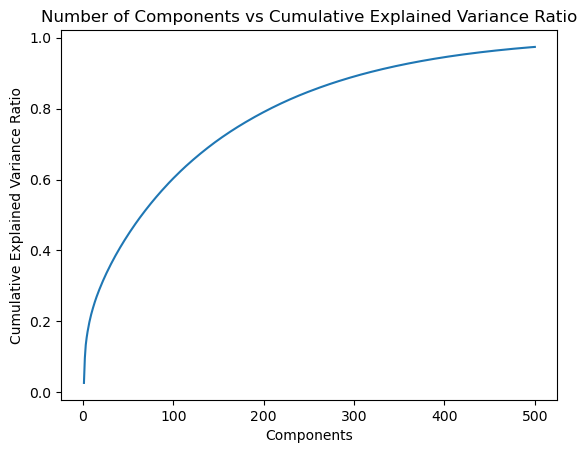

In [60]:
# view the plot
cum_evr500_df = pd.DataFrame(cum_evr500).set_index(0)
cum_evr500_df.plot(title='Number of Components vs Cumulative Explained Variance Ratio',
                xlabel='Components',
                ylabel='Cumulative Explained Variance Ratio',
                legend=False);

In [ ]:
# 3. Suggest a “good” number of components that best captures the info in the data set: 250 explains 80%+ of variance

In [ ]:
# 4. Fit another TruncatedSVD model with the “good” number of components

In [61]:
# apply SVD to the ratings
svd250 = TruncatedSVD(n_components=250)
U250 = svd250.fit_transform(X)

In [62]:
# view the U matrix
U250_df = pd.DataFrame(U250)
U250_df.head()

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,127.325618,7.173031,0.907461,5.231709,-2.167019,-1.874486,-4.432229,2.894944,2.266183,0.029383,...,-0.323168,-0.575113,0.622689,0.130567,-0.201398,0.249069,-0.154636,0.224331,0.237359,-0.072822
1,124.145754,-2.173872,0.531446,0.834728,2.276656,-0.611334,-0.515801,2.473437,1.182575,-0.290646,...,0.006387,0.673780,0.601859,-0.209970,0.187443,0.105433,-0.605912,-0.285287,-0.031951,0.336664
2,122.727835,-2.533028,0.567466,-0.600540,-0.735368,0.202150,-0.220568,-1.349227,0.322607,-0.567155,...,-0.013068,0.217710,0.108413,0.277657,-0.154447,-0.188468,0.052944,-0.555638,-0.056753,0.420362
3,123.802128,-2.822308,-0.533045,0.232890,-0.125395,0.595281,-0.011407,0.062386,-0.514061,0.398184,...,0.431670,-0.335970,0.077135,-0.477374,0.119573,0.116115,-0.004552,0.479781,-0.002482,0.299499
4,122.566026,0.754483,0.591899,1.772757,-4.253326,1.408859,-3.002253,2.684718,0.209390,1.068307,...,-0.675598,0.094463,0.441984,-0.053772,-0.100309,0.014826,-0.516867,-0.212406,-0.819141,0.883283


In [63]:
# view the shape of the U matrix (users x latent features)
U250.shape

(943, 250)

In [64]:
# cumulative explained variance ratio
sum(svd250.explained_variance_ratio_)

0.8468515235718619

### 5. Making collaborative filtering recommendation

In [68]:
# 1. View the new user vector
import pandas as pd
import numpy as np

# create a vector of NaN values
vector_length = X.shape[1]
new_user = np.full(vector_length, np.NaN)

# populate with 5 ratings
ratings = [5, 3, 5, 5, 4]
positions_to_populate = [11, 14, 28, 63, 66]
new_user[positions_to_populate] = ratings

# view as a DataFrame
new_user_df = pd.DataFrame([new_user], columns=movies.Movie_Title)
new_user_df

Movie_Title,Toy Story (1995),GoldenEye (1995),Four Rooms (1995),Get Shorty (1995),Copycat (1995),Shanghai Triad (Yao a yao yao dao waipo qiao) (1995),Twelve Monkeys (1995),Babe (1995),Dead Man Walking (1995),Richard III (1995),...,Mirage (1995),Mamma Roma (1962),"Sunchaser, The (1996)","War at Home, The (1996)",Sweet Nothing (1995),Mat' i syn (1997),B. Monkey (1998),Sliding Doors (1998),You So Crazy (1994),Scream of Stone (Schrei aus Stein) (1991)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
# view only the movies that the new user rated

new_user_df.T.dropna()

,0
Movie_Title,
"Usual Suspects, The (1995)",5.0
Mr. Holland's Opus (1995),3.0
Batman Forever (1995),5.0
"Shawshank Redemption, The (1994)",5.0
Ace Ventura: Pet Detective (1994),4.0


In [72]:
# 2. Transform the user into the latent space using .transform()

new_user_250 = svd250.transform(new_user_df.fillna(3))
new_user_250[0][:5]

array([ 1.23173718e+02, -2.50283200e+00,  1.16245959e-01, -1.52219130e-01,
       -2.28008887e-01])

In [74]:
# 3. Reconstruct the user-item matrix for the user using np.dot()

new_user_pred = np.dot(new_user_250, svd250.components_)
new_user_pred

array([[3.01036536, 3.11225078, 3.07981996, ..., 3.00355275, 3.00431946,
        3.00431946]])

In [75]:
# 4. Make 10 movie recommendations for the user

new_user_recs = pd.DataFrame(new_user_pred, columns=movies.Movie_Title)
new_user_recs

Movie_Title,Toy Story (1995),GoldenEye (1995),Four Rooms (1995),Get Shorty (1995),Copycat (1995),Shanghai Triad (Yao a yao yao dao waipo qiao) (1995),Twelve Monkeys (1995),Babe (1995),Dead Man Walking (1995),Richard III (1995),...,Mirage (1995),Mamma Roma (1962),"Sunchaser, The (1996)","War at Home, The (1996)",Sweet Nothing (1995),Mat' i syn (1997),B. Monkey (1998),Sliding Doors (1998),You So Crazy (1994),Scream of Stone (Schrei aus Stein) (1991)
0,3.010365,3.112251,3.07982,2.91794,3.037794,3.019608,3.047647,3.038144,3.032098,3.155442,...,3.004319,3.001643,3.004319,3.001502,3.004319,3.002786,3.004319,3.003553,3.004319,3.004319


In [76]:
# sort the recommendations
top_recs = new_user_recs.T.sort_values(by=0, ascending=False).head(14)
top_recs.columns = ['Recs']
top_recs

,Recs
Movie_Title,
"Shawshank Redemption, The (1994)",4.497083
"Usual Suspects, The (1995)",4.406534
Batman Forever (1995),3.530240
Ace Ventura: Pet Detective (1994),3.328778
Reservoir Dogs (1992),3.211801
Happy Gilmore (1996),3.186964
Seven (Se7en) (1995),3.184303
It's a Wonderful Life (1946),3.181601
Speed (1994),3.178901


In [77]:
# movies already watched
already_rated = new_user_df.T.dropna().index
already_rated

Index(['Usual Suspects, The (1995)', 'Mr. Holland's Opus (1995)',
       'Batman Forever (1995)', 'Shawshank Redemption, The (1994)',
       'Ace Ventura: Pet Detective (1994)'],
      dtype='object', name='Movie_Title')

In [79]:
# exclude movies already watched

top_recs[~top_recs.index.isin(already_rated)]

,Recs
Movie_Title,
Reservoir Dogs (1992),3.211801
Happy Gilmore (1996),3.186964
Seven (Se7en) (1995),3.184303
It's a Wonderful Life (1946),3.181601
Speed (1994),3.178901
Billy Madison (1995),3.166737
Tommy Boy (1995),3.162168
Philadelphia (1993),3.159031
Richard III (1995),3.155442


In [ ]:
# 5. Review the movies and determine if they make sense

In [ ]:
# 6. Optional: Try playing around with the number of components to see the difference in movie recommendations